<a href="https://colab.research.google.com/github/smoralesc91/DataScience2024/blob/main/T2_mod_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2

In [2]:
# Bibliotecas utilitarias
import os
import time
import math
import numpy as np
import pandas as pd
import seaborn as sns

# Bibliotecas para el analisis de clustering
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Bibliotecas para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

# Bibliiotecas para estandarizar
from sklearn.preprocessing import StandardScaler

# Lectura de datos

In [3]:
url = 'https://raw.githubusercontent.com/smoralesc91/DataScience2024/5e43cd1fc76b2a1d00ff30e3e4ef4c6fca3eb2ed/Data/well_data_rev1.csv'
data = pd.read_csv(url)
data.head(5)

,DEPTH,CALI,GR,ILD,PEF,RHOB,NPHI,SHALE
0,5000.0,8.8,125,2.6,2.6,2.199,0.403,1
1,5000.5,8.8,129,2.5,2.7,2.209,0.373,1
2,5001.0,8.8,133,2.6,2.9,2.232,0.378,1
3,5001.5,8.8,142,2.8,3.1,2.268,0.386,1
4,5002.0,8.7,147,3.1,2.9,2.295,0.375,1


In [4]:
registros_geofisicos = ['GR','ILD','PEF','RHOB','NPHI']

In [20]:
X = data[registros_geofisicos].values
print(X)

[[1.250e+02 2.600e+00 2.600e+00 2.199e+00 4.030e-01]
 [1.290e+02 2.500e+00 2.700e+00 2.209e+00 3.730e-01]
 [1.330e+02 2.600e+00 2.900e+00 2.232e+00 3.780e-01]
 ...
 [3.200e+01 7.180e+01 4.800e+00 2.672e+00 1.500e-02]
 [3.100e+01 7.330e+01 4.900e+00 2.676e+00 1.500e-02]
 [3.300e+01 7.460e+01 5.000e+00 2.673e+00 1.500e-02]]


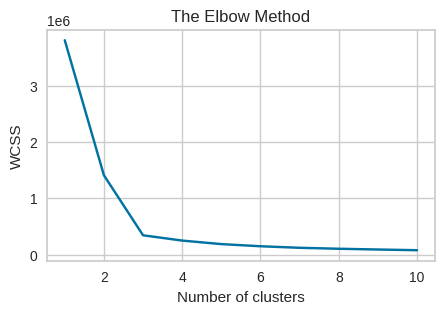

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 ... 3 3 3]


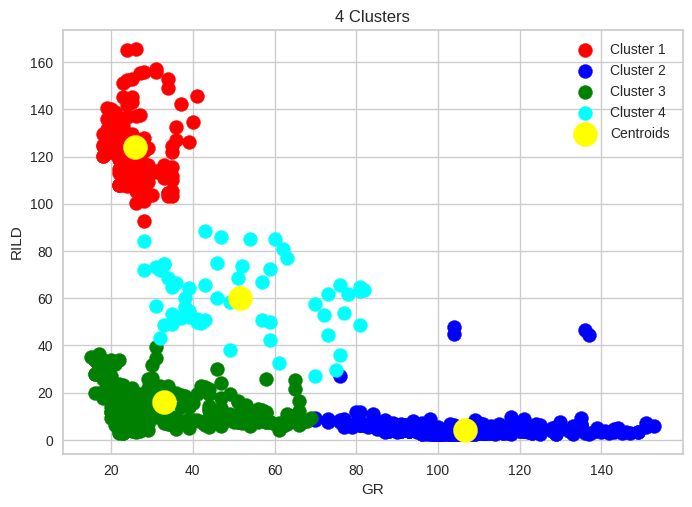

In [8]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('4 Clusters')
plt.xlabel('GR')
plt.ylabel('RILD')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(X, y_kmeans)}')

Silhouette Score(n=4): 0.7406894999620173


In [10]:
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(df_original_ext[registros_geofisicos])
X_scores = clf.negative_outlier_factor_

NameError: name 'df_original_ext' is not defined

In [ ]:
n_inliers = (y_pred == 1).sum(); print(f"Number of inliers: {n_inliers}")
n_outliers = (y_pred == -1).sum(); print(f"Number of outliers: {n_outliers}")
n_total = n_inliers + n_outliers; print(f"Total: {n_total}")

Number of inliers: 1149
Number of outliers: 52
Total: 1201


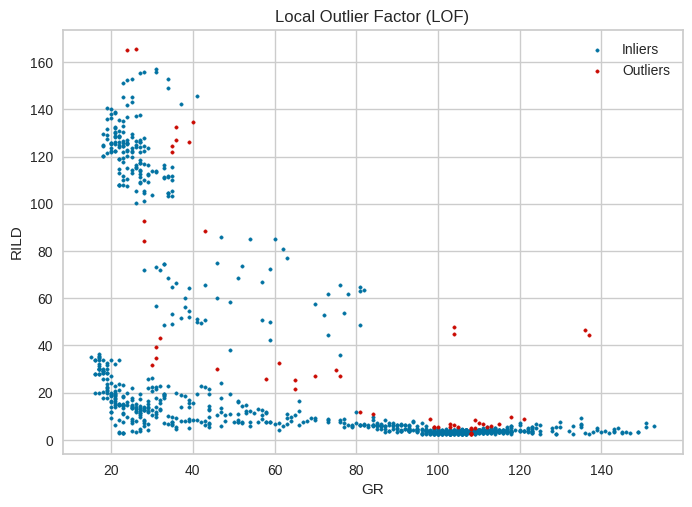

In [ ]:
ds_numpy = df_original_ext[registros_geofisicos].to_numpy()
colors = np.array(["#377eb8", "#ff7f00"])
good = ds_numpy[y_pred == 1]
outliers = ds_numpy[y_pred == -1]

plt.title("Local Outlier Factor (LOF)")

plt.scatter(good[:, 0], good[:, 1], color='b', s=6.0, label="Inliers")
plt.scatter(outliers[:, 0], outliers[:, 1], color='r', s=6.0, label="Outliers")

legend = plt.legend()
plt.xlabel('GR')
plt.ylabel('RILD')
plt.show()

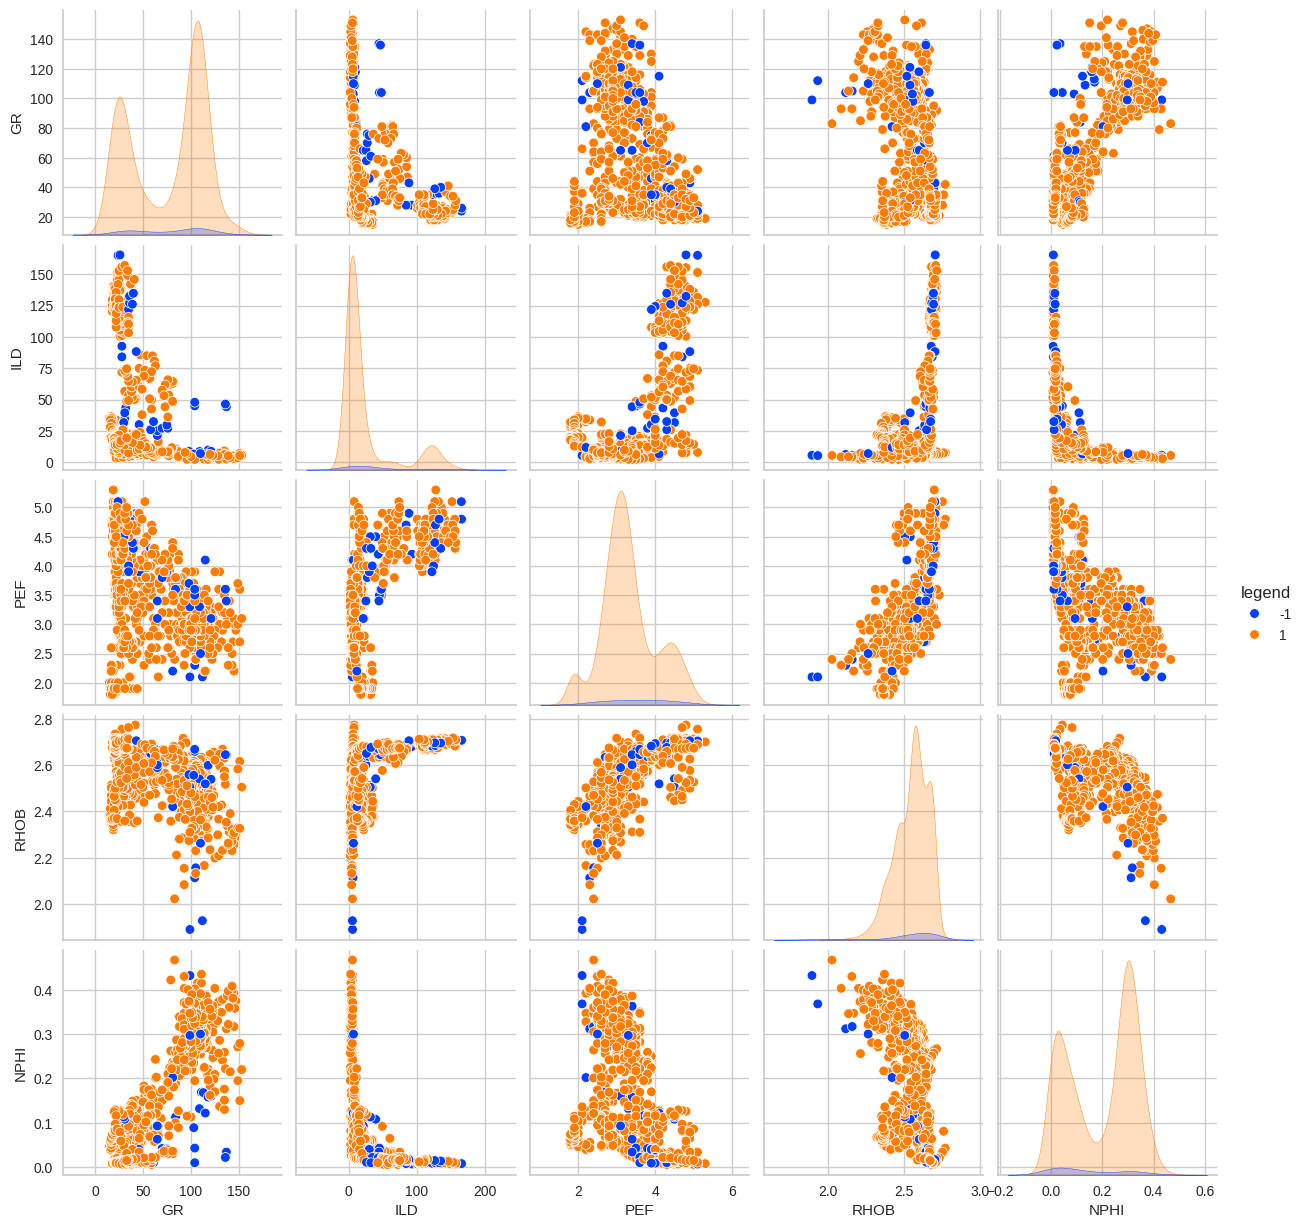

In [ ]:
sns.color_palette('bright')
data = df_original_ext[registros_geofisicos].copy()
data.columns=registros_geofisicos
data['legend'] = y_pred
sns.pairplot(data, hue='legend', palette='bright')
#plt.savefig(currdir + Figure_Path + 'Scatterplot Matrix LOF' + filename +'.png', dpi=300)
plt.show()

# Distancia de Mahalanobis

In [ ]:
from sklearn.covariance import MinCovDet
# Calcula la distancia de Mahalanobis (DM)
mcd = MinCovDet()
mcd.fit(data)
mahalanobis_distances = mcd.mahalanobis(data)


print("\nDistancia de Mahalanobis (DM):")
print(mahalanobis_distances)


Distancia de Mahalanobis (DM):
[  13.14926058   15.07607329   16.20352757 ... 3221.72372277 3388.32932369
 3547.90445243]


In [ ]:
len(mahalanobis_distances)

1201

# Datos estandarizados

In [ ]:
scaler = StandardScaler()

# Ajustar el scaler a los datos y transformarlos
X_estandarizado = scaler.fit_transform(data)

# Imprimir los datos estandarizados
print("Datos originales:")
print(data)
print("\nDatos estandarizados:")
print(X_estandarizado)

Datos originales:
       GR   ILD  PEF   RHOB   NPHI  legend
0     125   2.6  2.6  2.199  0.403       1
1     129   2.5  2.7  2.209  0.373       1
2     133   2.6  2.9  2.232  0.378       1
3     142   2.8  3.1  2.268  0.386       1
4     147   3.1  2.9  2.295  0.375       1
...   ...   ...  ...    ...    ...     ...
1196   35  64.6  4.7  2.671  0.017       1
1197   34  68.5  4.9  2.673  0.017       1
1198   32  71.8  4.8  2.672  0.015       1
1199   31  73.3  4.9  2.676  0.015       1
1200   33  74.6  5.0  2.673  0.015       1

[1201 rows x 6 columns]

Datos estandarizados:
[[ 1.25647456 -0.55533885 -1.01365286 -3.04958425  1.58041462  0.21273633]
 [ 1.36014137 -0.55778019 -0.87301086 -2.96271511  1.35237435  0.21273633]
 [ 1.46380819 -0.55533885 -0.59172688 -2.76291609  1.39038106  0.21273633]
 ...
 [-1.15377882  1.13406245  2.08047096  1.05932615 -1.36890616  0.21273633]
 [-1.17969552  1.17068242  2.22111295  1.0940738  -1.36890616  0.21273633]
 [-1.12786211  1.20241973  2.36175495 